In [18]:
!pip install pandas numpy matplotlib seaborn wordcloud

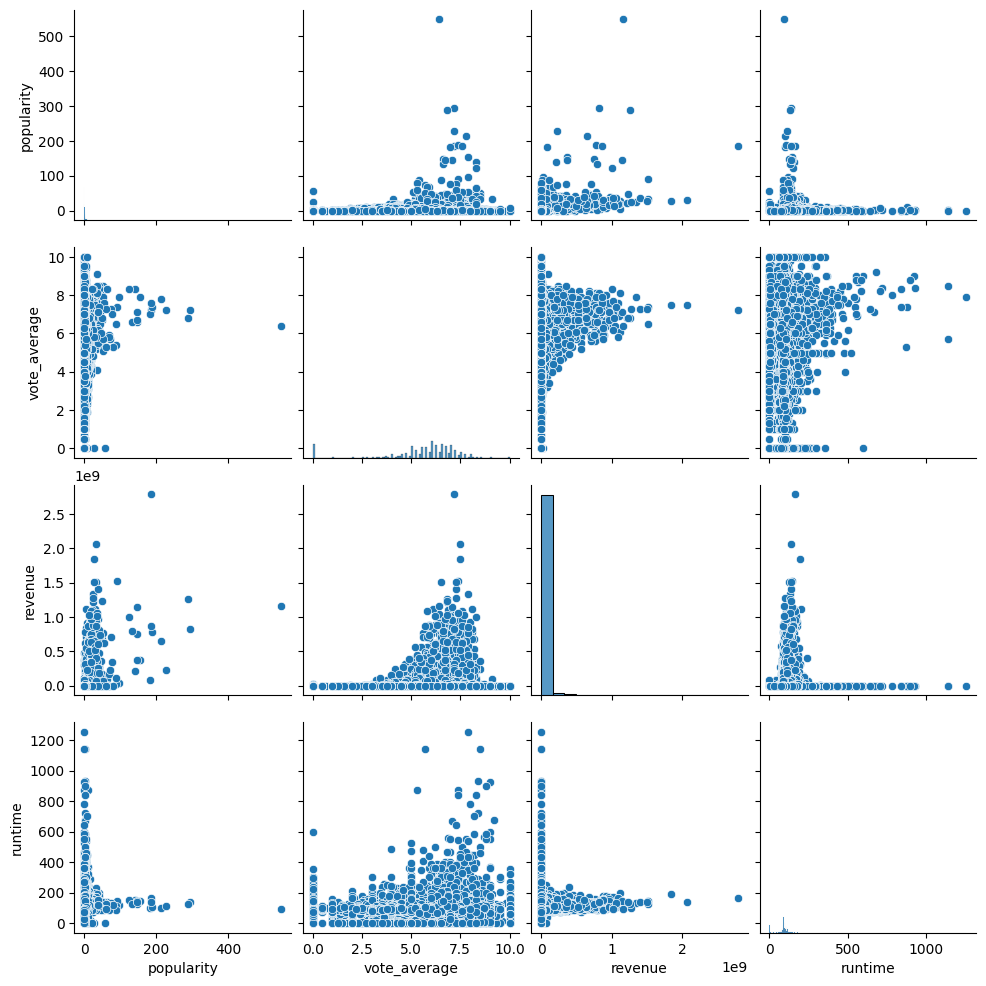

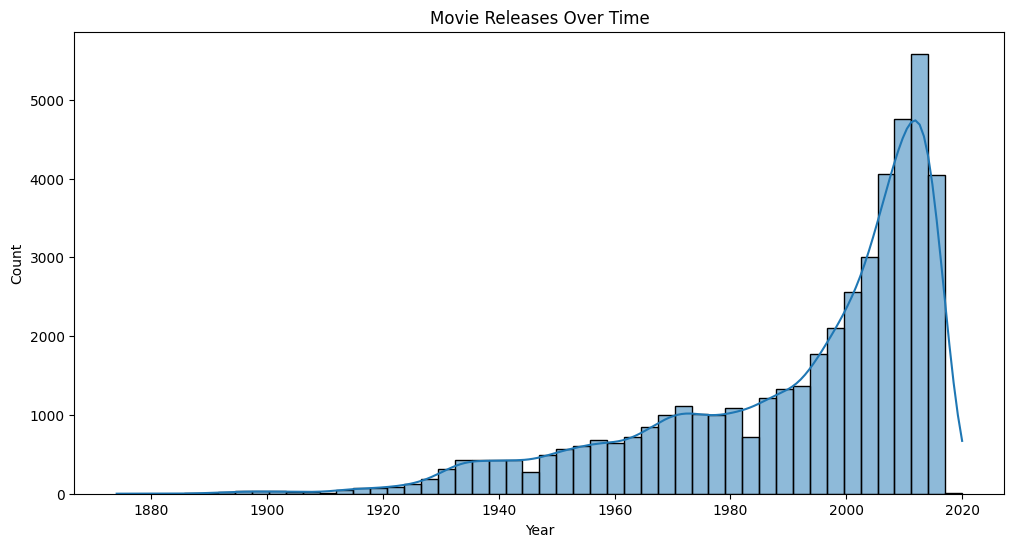

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with error handling
movies = pd.read_csv("movies_metadata.csv", low_memory=False, on_bad_lines="skip")

# Convert columns to numeric where applicable
movies["popularity"] = pd.to_numeric(movies["popularity"], errors='coerce')
movies["vote_average"] = pd.to_numeric(movies["vote_average"], errors='coerce')
movies["revenue"] = pd.to_numeric(movies["revenue"], errors='coerce')
movies["runtime"] = pd.to_numeric(movies["runtime"], errors='coerce')

# Scatter plot to show relationships
sns.pairplot(movies, vars=["popularity", "vote_average", "revenue", "runtime"])
plt.show()

# Movies release trend
movies["release_date"] = pd.to_datetime(movies["release_date"], errors='coerce')
movies["year"] = movies["release_date"].dt.year

plt.figure(figsize=(12,6))
sns.histplot(movies["year"].dropna(), bins=50, kde=True)
plt.title("Movie Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


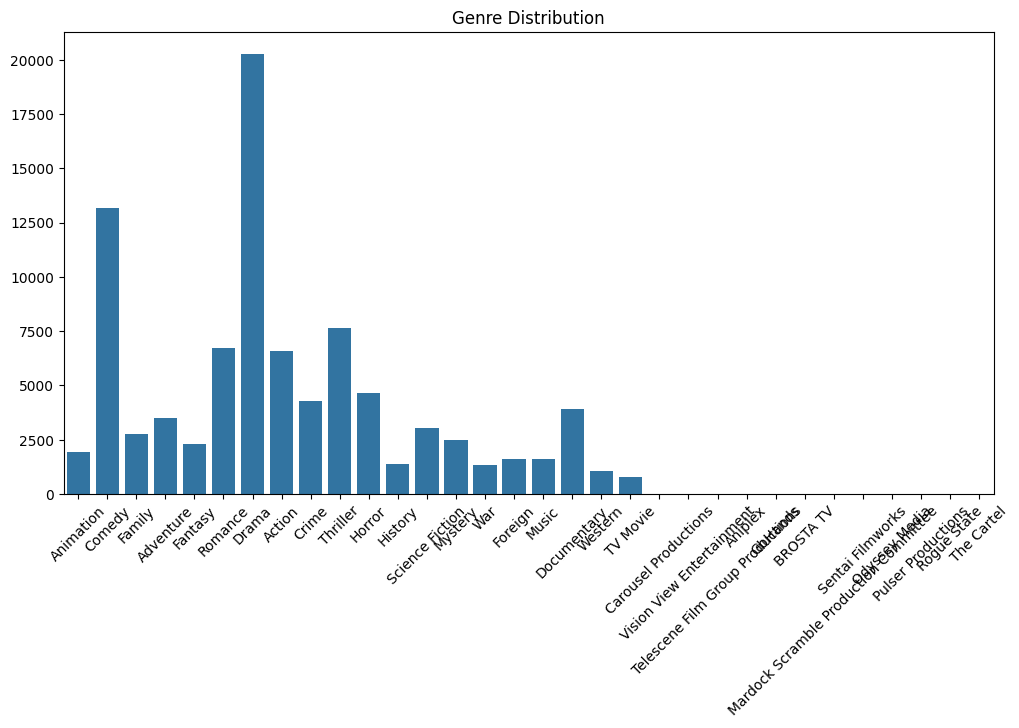

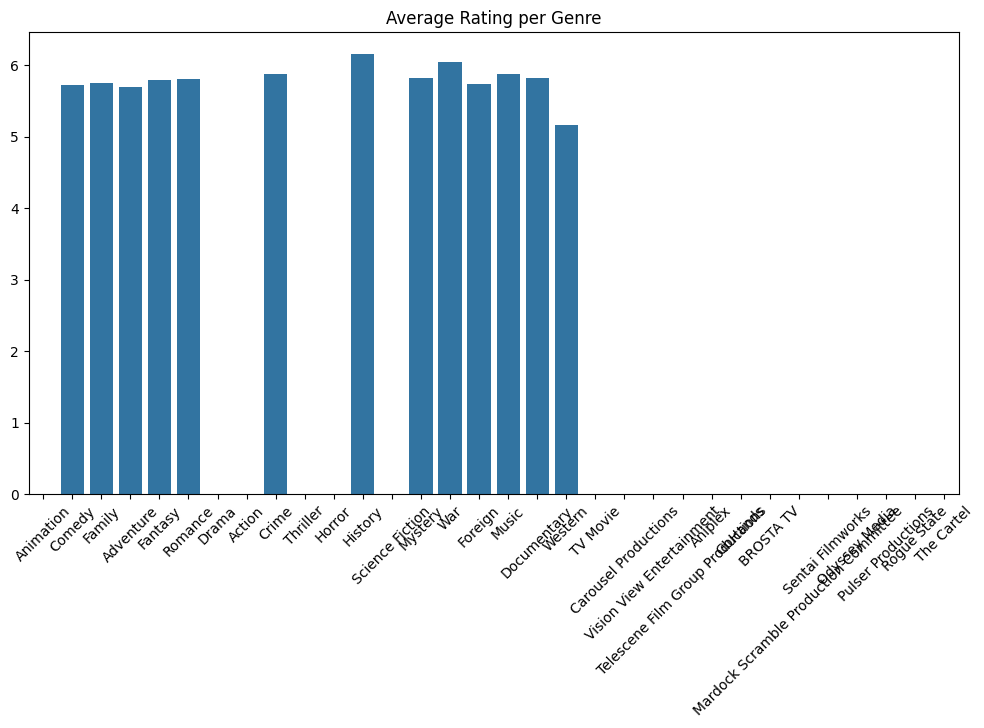

In [27]:
import ast

# Extract genres from JSON-like format
def parse_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre["name"] for genre in genres]
    except:
        return []

movies["genres"] = movies["genres"].apply(parse_genres)

# Flatten and count genres
from collections import Counter
genre_counter = Counter([genre for genres in movies["genres"] for genre in genres])

# Bar plot of genre distribution
plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counter.keys()), y=list(genre_counter.values()))
plt.xticks(rotation=45)
plt.title("Genre Distribution")
plt.show()

# Popularity by genre
genre_popularity = {}
for i, row in movies.iterrows():
    for genre in row["genres"]:
        if genre in genre_popularity:
            genre_popularity[genre].append(row["vote_average"])
        else:
            genre_popularity[genre] = [row["vote_average"]]

genre_avg_rating = {g: sum(ratings)/len(ratings) for g, ratings in genre_popularity.items()}

plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_avg_rating.keys()), y=list(genre_avg_rating.values()))
plt.xticks(rotation=45)
plt.title("Average Rating per Genre")
plt.show()


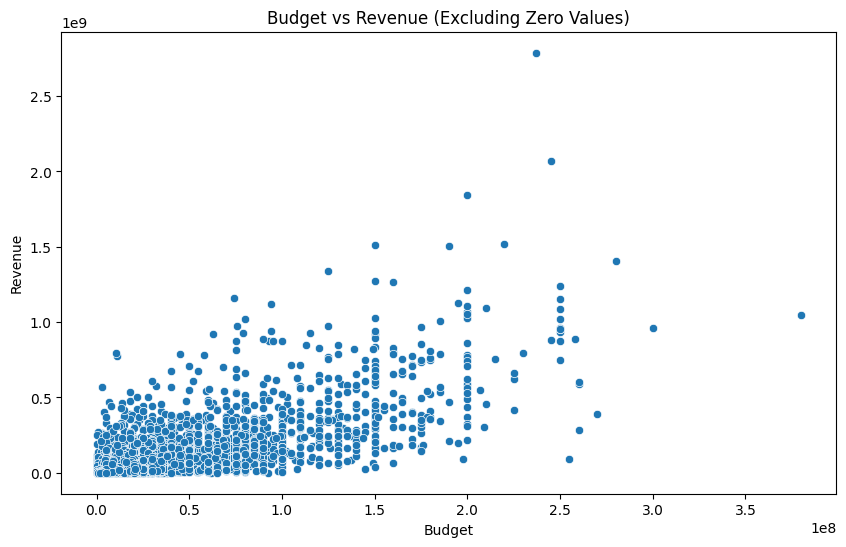

                               title      budget      revenue           ROI
14192            Paranormal Activity     15000.0  193355800.0  12889.386667
2595         The Blair Witch Project     60000.0  248000000.0   4132.333333
1909                           Bambi    858000.0  267447150.0    310.709965
1873                       Halloween    300000.0   70000000.0    232.333333
219                           Clerks     27000.0    3151130.0    115.708519
2542   The Rocky Horror Picture Show   1200000.0  112892319.0     93.076932
993                       Cinderella   2900000.0  263591415.0     89.893591
256                        Star Wars  11000000.0  775398007.0     69.490728
1338                            Jaws   7000000.0  470654000.0     66.236286
16884                      Insidious   1500000.0   97009150.0     63.672767


<ipython-input-21-d92275da1413>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies["ROI"] = (filtered_movies["revenue"] - filtered_movies["budget"]) / filtered_movies["budget"]


In [21]:
# Convert 'budget' column to numeric before calculating ROI
movies["budget"] = pd.to_numeric(movies["budget"], errors='coerce')

# Remove rows where budget or revenue is 0
filtered_movies = movies[(movies["budget"] > 0) & (movies["revenue"] > 0)]

# Scatter plot for budget vs revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x=filtered_movies["budget"], y=filtered_movies["revenue"])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue (Excluding Zero Values)")
plt.show()

# Calculate ROI (Return on Investment)
filtered_movies["ROI"] = (filtered_movies["revenue"] - filtered_movies["budget"]) / filtered_movies["budget"]
movies_sorted = filtered_movies.sort_values(by="ROI", ascending=False).dropna()

# Top 10 ROI movies
print(movies_sorted[["title", "budget", "revenue", "ROI"]].head(10))


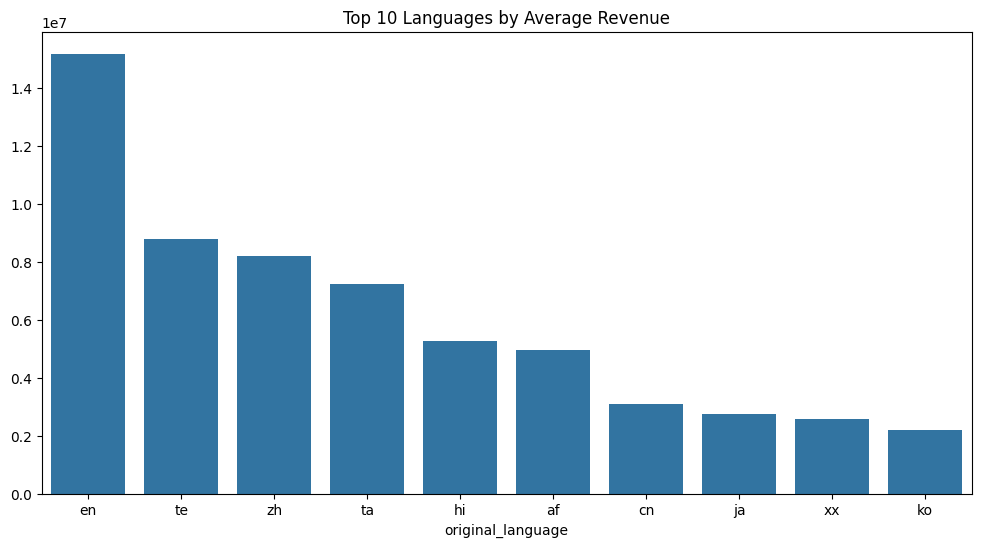

In [22]:
# Revenue by language
lang_revenue = movies.groupby("original_language")["revenue"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=lang_revenue.index[:10], y=lang_revenue.values[:10])
plt.title("Top 10 Languages by Average Revenue")
plt.show()


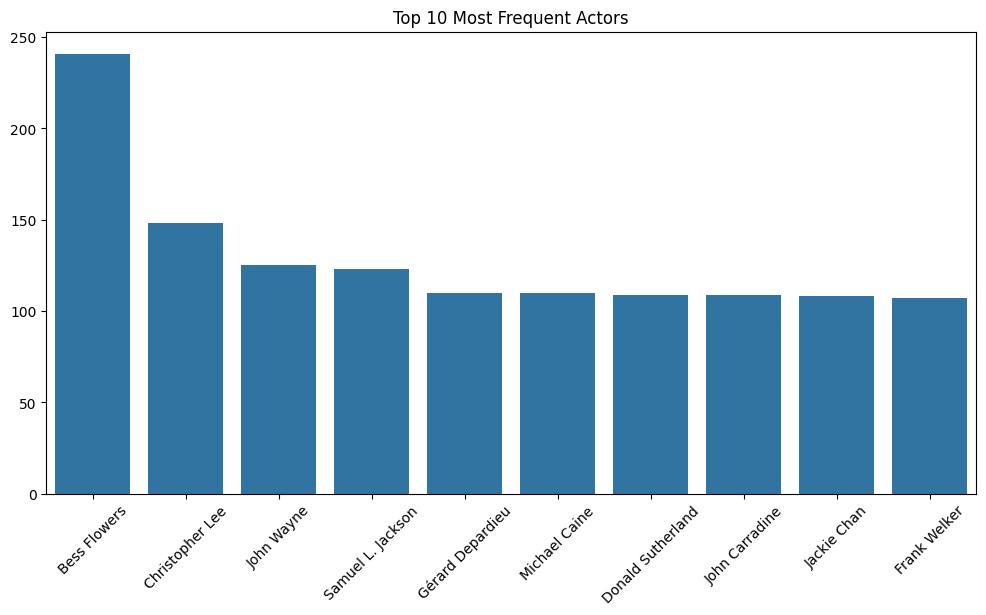

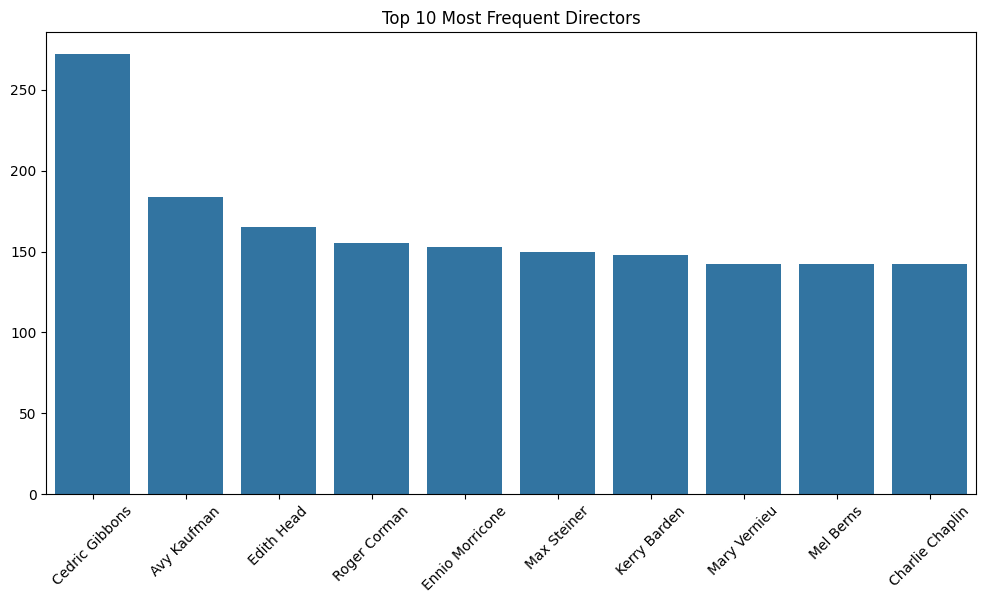

In [23]:
from collections import Counter

# Load credits dataset with error handling
credits = pd.read_csv("credits.csv", low_memory=False, on_bad_lines="skip")

# Function to extract top names from cast/crew columns
def extract_top_names(column, top_n=10):
    all_names = []
    for item in column.dropna():
        try:
            people = ast.literal_eval(item)  # Convert string to list of dicts
            all_names.extend([p["name"] for p in people])
        except:
            pass  # Skip rows with errors
    return Counter(all_names).most_common(top_n)

# Extract top actors and directors
top_actors = extract_top_names(credits["cast"])
top_directors = extract_top_names(credits["crew"])

# Plot top actors
plt.figure(figsize=(12,6))
sns.barplot(x=[x[0] for x in top_actors], y=[x[1] for x in top_actors])
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Actors")
plt.show()

# Plot top directors
plt.figure(figsize=(12,6))
sns.barplot(x=[x[0] for x in top_directors], y=[x[1] for x in top_directors])
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Directors")
plt.show()